# Case B4 BANK


## Situação:
O cliente B4 Bank é um aplicativo do setor financeiro que tem como objetivo conseguir uma maior visibilidade e retenção de usuários de forma orgânica. Como esse mercado tem crescido muito e é muito competitivo, ele resolveu investir em ASO com o RankMyApp, **focando seus esforços não só em visualizações mas também em instalações, ou seja, não apenas os usuários visualizarão o app na loja como também irão instalá-lo e utilizá-lo por um longo período de tempo. (Retenção de 15-30 dias).**
Através do nosso sistema, recebemos informações relacionadas às instalações, concorrentes, performance das palavras-chave (keywords), notas e comentários deixados na loja.

## Problema
O B4 Bank é cliente há alguns meses e eles gostariam de saber como tem sido a performance do app. Como trabalhamos com ASO para este cliente, o que mais nos interessa são as **métricas de Canal Orgânico**. É a partir deste KPI que nos baseamos para verificar o impacto do nosso trabalho. O cliente também deseja **ter insights sobre o que os usuários estão comentando na loja e qual a sua situação diante dos seus concorrentes**. Realize um estudo utilizando Python para fazer a limpeza e manipulação de dados e crie um modelo de machine learning com uma das bases. Depois crie um relatório ou dashboard com a ferramenta que desejar para apresentar os dados.


# Glossário

2 tabelas no arquivo

### Reviews Bank
<details>
    <summary>Package Name</summary>
    Nome do aplicativo
</details>
<details>
    <summary>App Version Name</summary>
    Versão do aplicativo no momento de rating/review
</details>
<details>
    <summary>Reviewer Language</summary>
    Idioma de origem do rating/review
</details>
<details>
    <summary>Device</summary>
    Nome do aparelho registrado no comentário
</details>
<details>
    <summary>Review last update date and time</summary>
    Momento em que o rating/review foi registrado
</details>
<details>
    <summary>Star rating</summary>
    Rating selecionado ao app
</details>
<details>
    <summary>Review title</summary>
    Título do review
</details>
<details>
    <summary>Review text</summary>
    Review escrito pro app
</details>
<details>
    <summary>Sentiment</summary>
    Sentimento do usuário baseado em star rating
</details>

### Retained Bank
<details>
    <summary>Date</summary>
    Data de retenção dos dados
</details>
<details>
    <summary>Package name</summary>
    Nome do aplicativo
</details>
<details>
    <summary>Acquisition channel</summary>
    Canal de aquisição do usuário
</details>
<details>
    <summary>Store listing visitors</summary>
    Número de visitas ao app na loja
</details>
<details>
    <summary>Installers</summary>
    Números de instalações do app
</details>
<details>
    <summary>Visitor-to-installer conversion rate</summary>
    Taxa de visitas convertidas em instalações (installers/store listing visitors)
</details>
<details>
    <summary>Installers retained for 1 day</summary>
    Instalações retidas por 1 dia
</details>
<details>
    <summary>Installer-to-1 day retention rate</summary>
    Taxa de instalações retidas por 1 dia
</details>
<details>
    <summary>Installers retained for 7 day</summary>
    Instalações retidas por 7 dia
</details>
<details>
    <summary>Installer-to-7 day retention rate</summary>
    Taxa de instalações retidas por 7 dia
</details>
<details>
    <summary>Installers retained for 15 day</summary>
    Instalações retidas por 15 dia
</details>
<details>
    <summary>Installer-to-15 day retention rate</summary>
    Taxa de instalações retidas por 15 dia
</details>
<details>
    <summary>Installers retained for 30 day</summary>
    Instalações retidas por 30 dia
</details>
<details>
    <summary>Installer-to-30 day retention rate</summary>
    Taxa de instalações retidas por 30 dia
</details>

# Análise review

Overview dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
review_data = pd.read_excel("data.xlsx", sheet_name="Reviews_Bank")
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Package Name                      5679 non-null   object
 1   App Version Name                  5423 non-null   object
 2   Reviewer Language                 5679 non-null   object
 3   Device                            5673 non-null   object
 4   Review Last Update Date and Time  5679 non-null   object
 5   Star Rating                       5679 non-null   int64 
 6   Review Title                      1 non-null      object
 7   Review Text                       2756 non-null   object
 8   Sentiment                         1428 non-null   object
dtypes: int64(1), object(8)
memory usage: 399.4+ KB


## Dados Nulos
Analisando primeiramente os conteúdos nulos do arquivo através de uma simples plotagem é possível perceber uma grande quantidade de dados faltantes em colunas como: Review title, Review text, Sentiment. Em contra partida, App version Name e Device possuem poucos dados faltantes.

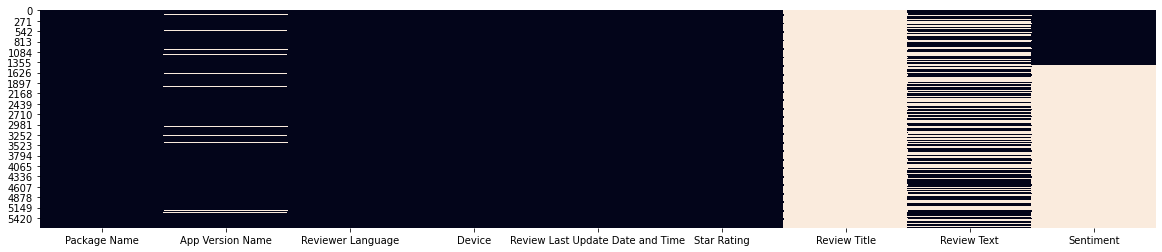

In [3]:
plt.figure(figsize=(20, 4))
sns.heatmap(review_data.isna(), cbar=False);

### Criação de colunas para versões do app
Como a tabela possui uma coluna versão, talvez seja válido separar as versões em colunas para alguma futura operação ao mesmo tempo preenchendo os dados faltantes com o valor de maior ocorrência, anotando também se é uma versão preenchida ou não.

In [4]:
review_data["imputed version"] = review_data["App Version Name"].isna()
review_data["App Version Name"] = review_data["App Version Name"].fillna(review_data["App Version Name"].value_counts().idxmax())
review_data["major version"] = review_data["App Version Name"].str.split(".").str[0].astype('float').astype('Int32')
review_data["minor version"] = review_data["App Version Name"].str.split(".").str[1].astype('float').astype('Int32')



### Manipulação de datas
Tornar as colunas como um objeto de data do pandas permite a manipulação e extração de números mais específicos como dia da semana, mês mais rapidamente.

In [5]:
review_data["Review Last Update Date and Time"] = pd.to_datetime(review_data["Review Last Update Date and Time"])
review_data["review year"] = review_data["Review Last Update Date and Time"].dt.year
review_data["review month"] = review_data["Review Last Update Date and Time"].dt.month
review_data["review day of week"] = review_data["Review Last Update Date and Time"].dt.dayofweek
review_data.head()

,Package Name,App Version Name,Reviewer Language,Device,Review Last Update Date and Time,Star Rating,Review Title,Review Text,Sentiment,imputed version,major version,minor version,review year,review month,review day of week
0,B4 Bank,6.10.6,pt,greatlte,2019-10-01 00:09:07+00:00,5,NaN,NaN,Positive,False,6,10,2019,10,1
1,B4 Bank,6.10.6,pt,mido,2019-10-01 00:18:49+00:00,5,NaN,NaN,Positive,False,6,10,2019,10,1
2,B4 Bank,6.10.6,pt,on5xelte,2019-10-01 00:34:35+00:00,5,NaN,Boa,Positive,False,6,10,2019,10,1
3,B4 Bank,6.10.6,pt,dreamlte,2019-10-01 00:44:18+00:00,2,NaN,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative,False,6,10,2019,10,1
4,B4 Bank,6.10.6,pt,starqltechn,2019-10-01 01:09:56+00:00,4,NaN,NaN,Positive,False,6,10,2019,10,1


## Modelo Machine Learning

Etapa de desenvolvimento de um modelo simples de random forest para fazer a predição de "star rating" presente nos dados de review

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [7]:
columns_model = ["Reviewer Language", "Star Rating", "Sentiment", "imputed version", 
                 "major version", "minor version", "review month", "review day of week"]

df_model = review_data[columns_model].copy()
df_model.head()

,Reviewer Language,Star Rating,Sentiment,imputed version,major version,minor version,review month,review day of week
0,pt,5,Positive,False,6,10,10,1
1,pt,5,Positive,False,6,10,10,1
2,pt,5,Positive,False,6,10,10,1
3,pt,2,Negative,False,6,10,10,1
4,pt,4,Positive,False,6,10,10,1


In [8]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Language   5679 non-null   object
 1   Star Rating         5679 non-null   int64 
 2   Sentiment           1428 non-null   object
 3   imputed version     5679 non-null   bool  
 4   major version       5679 non-null   Int32 
 5   minor version       5679 non-null   Int32 
 6   review month        5679 non-null   int64 
 7   review day of week  5679 non-null   int64 
dtypes: Int32(2), bool(1), int64(3), object(2)
memory usage: 283.0+ KB


In [9]:
df_model.groupby("Reviewer Language")["Sentiment"].value_counts(dropna=False)

Reviewer Language  Sentiment
cs                 Positive        1
de                 NaN             5
                   Positive        1
en                 NaN           135
                   Positive       40
                   Negative        8
                   Neutral         5
es                 NaN            11
                   Positive        4
fr                 NaN             3
                   Negative        2
it                 Positive        1
nl                 Positive        1
pt                 NaN          4096
                   Positive     1188
                   Negative      119
                   Neutral        58
zh-Hans            NaN             1
Name: Sentiment, dtype: int64

Aparentemente a maioria dos sentimentos são positivos, para o modelo montado os dados de NaN serão retirados pois caso fosse necessário completar poderia ocorrer um desbalanceamento de variáveis já que os dados faltantes são bem maiores do que os trabalhados atualmente.

In [10]:
df_model_clear = df_model.dropna(axis="rows")
df_model_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Language   1428 non-null   object
 1   Star Rating         1428 non-null   int64 
 2   Sentiment           1428 non-null   object
 3   imputed version     1428 non-null   bool  
 4   major version       1428 non-null   Int32 
 5   minor version       1428 non-null   Int32 
 6   review month        1428 non-null   int64 
 7   review day of week  1428 non-null   int64 
dtypes: Int32(2), bool(1), int64(3), object(2)
memory usage: 82.3+ KB


In [11]:
language_dummies = pd.get_dummies(df_model_clear["Reviewer Language"])
df_model_clear = pd.concat([df_model_clear, language_dummies], axis=1)
df_model_clear.drop("Reviewer Language", axis=1, inplace=True)
df_model_clear.head()

,Star Rating,Sentiment,imputed version,major version,minor version,review month,review day of week,cs,de,en,es,fr,it,nl,pt
0,5,Positive,False,6,10,10,1,0,0,0,0,0,0,0,1
1,5,Positive,False,6,10,10,1,0,0,0,0,0,0,0,1
2,5,Positive,False,6,10,10,1,0,0,0,0,0,0,0,1
3,2,Negative,False,6,10,10,1,0,0,0,0,0,0,0,1
4,4,Positive,False,6,10,10,1,0,0,0,0,0,0,0,1


In [12]:
sentiment_dummies = pd.get_dummies(df_model_clear["Sentiment"], drop_first=True)
df_model_clear = pd.concat([df_model_clear, sentiment_dummies], axis=1)
df_model_clear.drop("Sentiment", axis=1, inplace=True)
df_model_clear.head()

,Star Rating,imputed version,major version,minor version,review month,review day of week,cs,de,en,es,fr,it,nl,pt,Neutral,Positive
0,5,False,6,10,10,1,0,0,0,0,0,0,0,1,0,1
1,5,False,6,10,10,1,0,0,0,0,0,0,0,1,0,1
2,5,False,6,10,10,1,0,0,0,0,0,0,0,1,0,1
3,2,False,6,10,10,1,0,0,0,0,0,0,0,1,0,0
4,4,False,6,10,10,1,0,0,0,0,0,0,0,1,0,1


Transformação de colunas categóricas para um simples encoding binários com a ajuda de pd.get_dummies, para os sentimentos uma das colunas foram despejadas a fim de remover alguma possível redundância.

In [13]:
X = df_model_clear.drop("Star Rating", axis=1)
y = df_model_clear["Star Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

Separação de 80/20 para treino e teste do futuro modelo de Random Forest

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = mean_squared_error(y_test, preds,squared=False)

print("""
MAE: {}
MSE: {}
RMSE: {}
""".format(mae, mse, rmse))


MAE: 0.3109880678236614
MSE: 0.1679839773500316
RMSE: 0.4098584845407395



Três mericas simples de erros são testadas, MSE para punir maiores diferenças e MAE como uma forma mais linear. Os três valores parecem ser baixos e dentro da nossa escala não afetaria grosseiramente neste modelo simples.

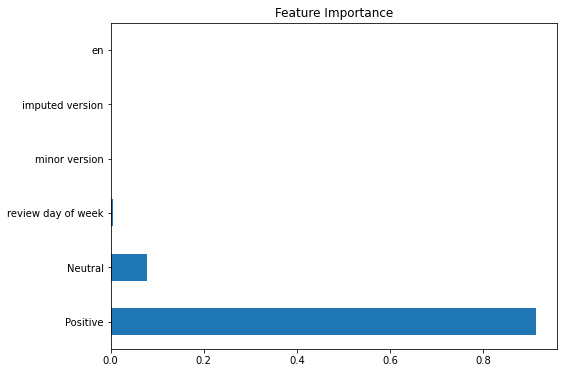

In [39]:
plt.figure(figsize=(8, 6))
features = pd.Series(rf_model.feature_importances_, index=X.columns)
features.nlargest(6).plot(kind="barh")
plt.title("Feature Importance");

Gráfico de importância das variáveis no modelo, os sentimentos nas reviews parecem realmente dar o ritmo das avaliações altas, entretanto nosso dataset possuia pouco balanceamento das classes o que levanta certa incerteza apesar das médias altas de notas.

## Análise de ratings
Métrica principal para ser analisada como forma de informar o cliente

### Análise dos sentimentos de texto

In [17]:
total = review_data[review_data["Sentiment"].notnull()]["Sentiment"].count()
print("Reviews com classificação de sentimento: {}".format(total))

Reviews com classificação de sentimento: 1428


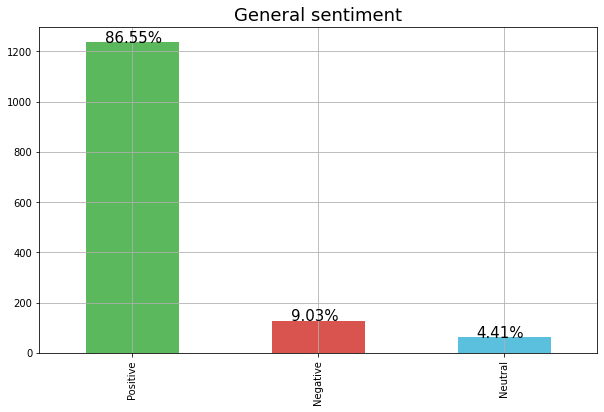

In [18]:
ax = review_data[review_data["Sentiment"].notnull()]["Sentiment"].value_counts().plot(kind="bar", 
                                                                                      color=['#5cb85c','#d9534f','#5bc0de'],
                                                                                      figsize=(10, 6));
ax.set_title("General sentiment", fontsize=18)

for i in ax.patches:
  ax.text(i.get_x()+0.1, i.get_height(), "{:.2f}%".format((i.get_height()/total)*100), fontsize=15)
ax.grid()

Com a coluna de sentimento pode-se ver grandes números de reviews positivas do aplicativo.

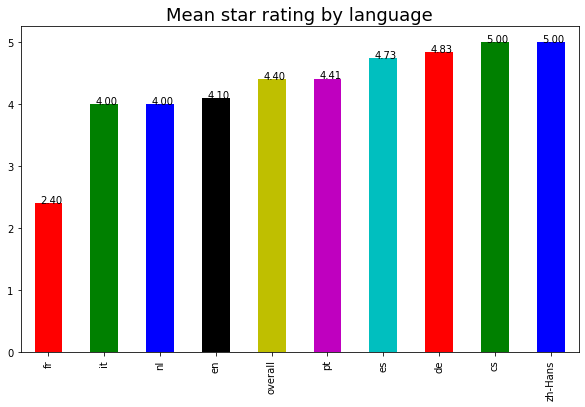

In [19]:
plt.figure(figsize=(10, 6))
df_star = review_data.groupby("Reviewer Language")["Star Rating"].mean()
overall = pd.Series(review_data["Star Rating"].mean(), index=["overall"])
df_star = df_star.append(overall)

ax = df_star.sort_values(ascending=True).plot(kind="bar", color=list("rgbkymc"))
for i in ax.patches:
  ax.text(i.get_x()+0.1, i.get_height(), "{:.2f}".format(i.get_height(), fontsize=15))
plt.title("Mean star rating by language", fontsize=18);

Média simples das notas através dos idiomas presentes

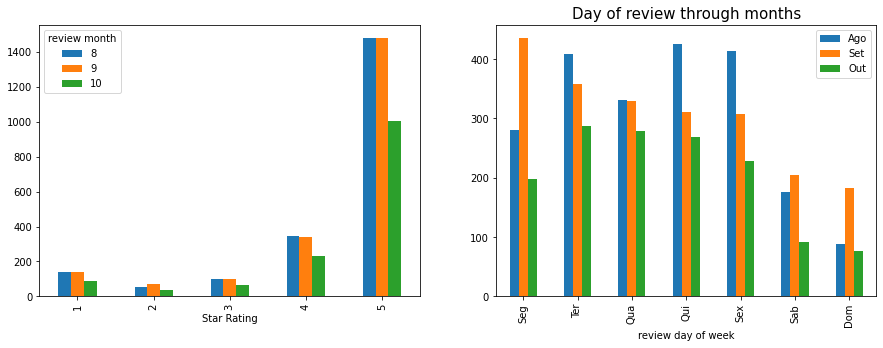

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
group_months_rating = review_data.groupby("review month")
review_data.groupby("review month")["Star Rating"].value_counts().unstack("review month").plot(kind="bar", ax=ax[0])
plt.legend(["Ago", "Set", "Out"])
plt.title("N# Ratings by months", fontsize=15);

labels = ["Seg", "Ter", "Qua", "Qui","Sex", "Sab", "Dom"]
review_data.groupby("review month")["review day of week"].value_counts().unstack("review month").plot(kind="bar", ax=ax[1])
ax[1].set_xticklabels(labels)
plt.legend(["Ago", "Set", "Out"])
plt.title("Day of review through months", fontsize=15);

Primeiro gráfico: quantidade de avaliações feitas durante o período, nota-se uma grande queda de notas 4 e 5 no último mês do período, algo aconteceu e deve ser analisado.

Segundo gráfico: plotagem dos dias em que os usuários são provavelmente mais ativos, realizando as reviews do aplicativo.

# Análise Retained
Análise mais técnica dos indicadores, utilizados posteriormente na paltaforma do datastudio, notebook usado apenas como uma forma de rascunho antes da apresentação de conteúdo

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
from operator import attrgetter
import matplotlib.colors as mcolors

In [23]:
retained_data = pd.read_excel("data.xlsx", sheet_name="Retained_Bank")
retained_data

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
1,2019-08-01 00:00:00,B4 Bank,Third-party referrers,514,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652
2,2019-08-01 00:00:00,B4 Bank,Other,113,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
4,2019-08-02 00:00:00,B4 Bank,Tracked channels (UTM),55,10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2019-10-29 00:00:00,B4 Bank,Other,55,12,0.218,7,0.583,6,0.500,6,0.500,6,0.500
313,2019-10-30 00:00:00,B4 Bank,Organic,2457,545,0.222,437,0.802,402,0.738,386,0.708,374,0.686
314,2019-10-30 00:00:00,B4 Bank,Tracked channels (UTM),207,15,0.072,8,0.533,6,0.400,6,0.400,6,0.400
315,2019-10-30 00:00:00,B4 Bank,Third-party referrers,2625,207,0.079,123,0.594,104,0.502,96,0.464,83,0.401


In [24]:
retained_data[retained_data["Acquisition Channel"] == "Organic"]

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
7,2019-08-03 00:00:00,B4 Bank,Organic,1725,401,0.232,360,0.898,348,0.868,348,0.868,340,0.848
11,2019-08-04 00:00:00,B4 Bank,Organic,1579,410,0.260,365,0.890,350,0.854,341,0.832,330,0.805
15,2019-08-05 00:00:00,B4 Bank,Organic,1488,374,0.251,334,0.893,323,0.864,317,0.848,303,0.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2019-10-26 00:00:00,B4 Bank,Organic,2125,385,0.181,338,0.878,314,0.816,305,0.792,296,0.769
301,2019-10-27 00:00:00,B4 Bank,Organic,2069,413,0.200,376,0.910,366,0.886,357,0.864,348,0.843
305,2019-10-28 00:00:00,B4 Bank,Organic,1532,270,0.176,240,0.889,220,0.815,208,0.770,195,0.722
309,2019-10-29 00:00:00,B4 Bank,Organic,1326,258,0.195,207,0.802,193,0.748,184,0.713,175,0.678


In [25]:
# Drop das linhas 196-199 pois a data não é um dia válido, 31/09 não existe
retained_data.drop([196,197,198,199], axis=0, inplace=True)
retained_data.iloc[195:200]

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
195,2019-09-30 00:00:00,B4 Bank,Other,103,12,0.117,12,1000.000,12,1000.000,12,1000.000,12,1000.000
200,2019-10-01 00:00:00,B4 Bank,Organic,1584,236,0.149,219,0.928,212,0.898,207,0.877,202,0.856
201,2019-10-01 00:00:00,B4 Bank,Tracked channels (UTM),223,9,0.040,6,0.667,6,0.667,6,0.667,6,0.667
202,2019-10-01 00:00:00,B4 Bank,Third-party referrers,1590,144,0.091,96,0.667,82,0.569,77,0.535,63,0.438
203,2019-10-01 00:00:00,B4 Bank,Other,79,9,0.114,9,1000.000,9,1000.000,9,1000.000,9,1000.000


In [26]:
# Resetando index
retained_data.reset_index(inplace=True)
retained_data.iloc[195:200]

,index,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
195,195,2019-09-30 00:00:00,B4 Bank,Other,103,12,0.117,12,1000.000,12,1000.000,12,1000.000,12,1000.000
196,200,2019-10-01 00:00:00,B4 Bank,Organic,1584,236,0.149,219,0.928,212,0.898,207,0.877,202,0.856
197,201,2019-10-01 00:00:00,B4 Bank,Tracked channels (UTM),223,9,0.040,6,0.667,6,0.667,6,0.667,6,0.667
198,202,2019-10-01 00:00:00,B4 Bank,Third-party referrers,1590,144,0.091,96,0.667,82,0.569,77,0.535,63,0.438
199,203,2019-10-01 00:00:00,B4 Bank,Other,79,9,0.114,9,1000.000,9,1000.000,9,1000.000,9,1000.000


In [27]:
df = retained_data[retained_data["Acquisition Channel"] == "Organic"]

df["User Period"] = df["Date"].apply(lambda x: x.strftime("%Y-%m-%d"))
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate,User Period
0,0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797,2019-08-01
3,3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791,2019-08-02
7,7,2019-08-03 00:00:00,B4 Bank,Organic,1725,401,0.232,360,0.898,348,0.868,348,0.868,340,0.848,2019-08-03
11,11,2019-08-04 00:00:00,B4 Bank,Organic,1579,410,0.260,365,0.890,350,0.854,341,0.832,330,0.805,2019-08-04
15,15,2019-08-05 00:00:00,B4 Bank,Organic,1488,374,0.251,334,0.893,323,0.864,317,0.848,303,0.810,2019-08-05


In [28]:
columns = ["Date", "Acquisition Channel", "Installers", "Installers retained for 1 day", "Installer-to-1 day retention rate",
           "Installers retained for 7 days", "Installer-to-7 days retention rate", "Installers retained for 15 days",
           "Installer-to-15 days retention rate", "Installers retained for 30 days", "Installer-to-30 days retention rate"]
df_retained = df[columns].copy()

In [29]:
df_retained

,Date,Acquisition Channel,Installers,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,Organic,414,359,0.867,344,0.831,335,0.809,330,0.797
3,2019-08-02 00:00:00,Organic,407,354,0.870,338,0.830,330,0.811,322,0.791
7,2019-08-03 00:00:00,Organic,401,360,0.898,348,0.868,348,0.868,340,0.848
11,2019-08-04 00:00:00,Organic,410,365,0.890,350,0.854,341,0.832,330,0.805
15,2019-08-05 00:00:00,Organic,374,334,0.893,323,0.864,317,0.848,303,0.810
...,...,...,...,...,...,...,...,...,...,...,...
293,2019-10-26 00:00:00,Organic,385,338,0.878,314,0.816,305,0.792,296,0.769
297,2019-10-27 00:00:00,Organic,413,376,0.910,366,0.886,357,0.864,348,0.843
301,2019-10-28 00:00:00,Organic,270,240,0.889,220,0.815,208,0.770,195,0.722
305,2019-10-29 00:00:00,Organic,258,207,0.802,193,0.748,184,0.713,175,0.678


In [30]:
df_retained["UserPeriod"] = df_retained["Date"].apply(lambda x: x.strftime("%Y-%m-%d"))
df_retained.head(10)

,Date,Acquisition Channel,Installers,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate,UserPeriod
0,2019-08-01 00:00:00,Organic,414,359,0.867,344,0.831,335,0.809,330,0.797,2019-08-01
3,2019-08-02 00:00:00,Organic,407,354,0.870,338,0.830,330,0.811,322,0.791,2019-08-02
7,2019-08-03 00:00:00,Organic,401,360,0.898,348,0.868,348,0.868,340,0.848,2019-08-03
11,2019-08-04 00:00:00,Organic,410,365,0.890,350,0.854,341,0.832,330,0.805,2019-08-04
15,2019-08-05 00:00:00,Organic,374,334,0.893,323,0.864,317,0.848,303,0.810,2019-08-05
18,2019-08-06 00:00:00,Organic,244,217,0.889,200,0.820,193,0.791,188,0.770,2019-08-06
21,2019-08-07 00:00:00,Organic,171,142,0.830,138,0.807,132,0.772,127,0.743,2019-08-07
24,2019-08-08 00:00:00,Organic,362,314,0.867,303,0.837,296,0.818,289,0.798,2019-08-08
28,2019-08-09 00:00:00,Organic,237,211,0.890,201,0.848,199,0.840,194,0.819,2019-08-09
32,2019-08-10 00:00:00,Organic,340,309,0.909,293,0.862,289,0.850,280,0.824,2019-08-10


In [31]:
df_retained["CohortGroup"] = df_retained.groupby(level=0)["Date"].min().apply(lambda x: x.strftime("%Y-%m"))
df_retained.head()

,Date,Acquisition Channel,Installers,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate,UserPeriod,CohortGroup
0,2019-08-01 00:00:00,Organic,414,359,0.867,344,0.831,335,0.809,330,0.797,2019-08-01,2019-08
3,2019-08-02 00:00:00,Organic,407,354,0.870,338,0.830,330,0.811,322,0.791,2019-08-02,2019-08
7,2019-08-03 00:00:00,Organic,401,360,0.898,348,0.868,348,0.868,340,0.848,2019-08-03,2019-08
11,2019-08-04 00:00:00,Organic,410,365,0.890,350,0.854,341,0.832,330,0.805,2019-08-04,2019-08
15,2019-08-05 00:00:00,Organic,374,334,0.893,323,0.864,317,0.848,303,0.810,2019-08-05,2019-08


In [32]:
grouped = df_retained.groupby(["CohortGroup", "UserPeriod"])

cohorts = grouped.agg({"Installers": pd.Series,
                       "Installers retained for 1 day": pd.Series.unique,
                       "Installers retained for 7 days": pd.Series.unique,
                       "Installers retained for 15 days": pd.Series.unique,
                       "Installers retained for 30 days": pd.Series.unique})
cohorts.head()

Installers  ...  Installers retained for 30 days
CohortGroup UserPeriod              ...                                 
2019-08     2019-08-01         414  ...                              330
            2019-08-02         407  ...                              322
            2019-08-03         401  ...                              340
            2019-08-04         410  ...                              330
            2019-08-05         374  ...                              303

[5 rows x 5 columns]

In [33]:
def cohort_period(df):
  df["CohortPeriod"] = np.arange(len(df)) + 1
  return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

Installers  ...  CohortPeriod
CohortGroup UserPeriod              ...              
2019-08     2019-08-01         414  ...             1
            2019-08-02         407  ...             2
            2019-08-03         401  ...             3
            2019-08-04         410  ...             4
            2019-08-05         374  ...             5

[5 rows x 6 columns]

In [35]:
cohorts.reset_index(inplace=True)
cohorts.set_index(["CohortGroup", "CohortPeriod"], inplace=True)
cohort_group_size = cohorts["Installers"].unstack(0)
cohort_group_size.head()

CohortGroup,2019-08,2019-09,2019-10
CohortPeriod,,,
1,414.0,453.0,236.0
2,407.0,387.0,483.0
3,401.0,266.0,480.0
4,410.0,226.0,450.0
5,374.0,508.0,405.0


In [36]:
user_retention = cohorts[["Installers retained for 1 day",
                             "Installers retained for 7 days",
                             "Installers retained for 15 days",
                             "Installers retained for 30 days"]].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

Installers retained for 1 day            ... Installers retained for 30 days          
CohortGroup                        2019-08   2019-09  ...                         2019-09   2019-10
CohortPeriod                                          ...                                          
1                                 0.867150  0.907285  ...                        0.818985  0.855932
2                                 0.869779  0.881137  ...                        0.770026  0.828157
3                                 0.897756  0.830827  ...                        0.725564  0.785417
4                                 0.890244  0.893805  ...                        0.800885  0.824444
5                                 0.893048  0.864173  ...                        0.787402  0.844444
6                                 0.889344  0.872570  ...                        0.784017  0.800512
7                                 0.830409  0.865462  ...                        0.787149  0.784615
8                                 0.867403  0.878049  ...                        0.788618  0.790576
9                                 0.890295  0.917949  ...                        0.841026  0.804989
10                                0.908824  0.881279  ...                        0.794521  0.809524

[10 rows x 12 columns]

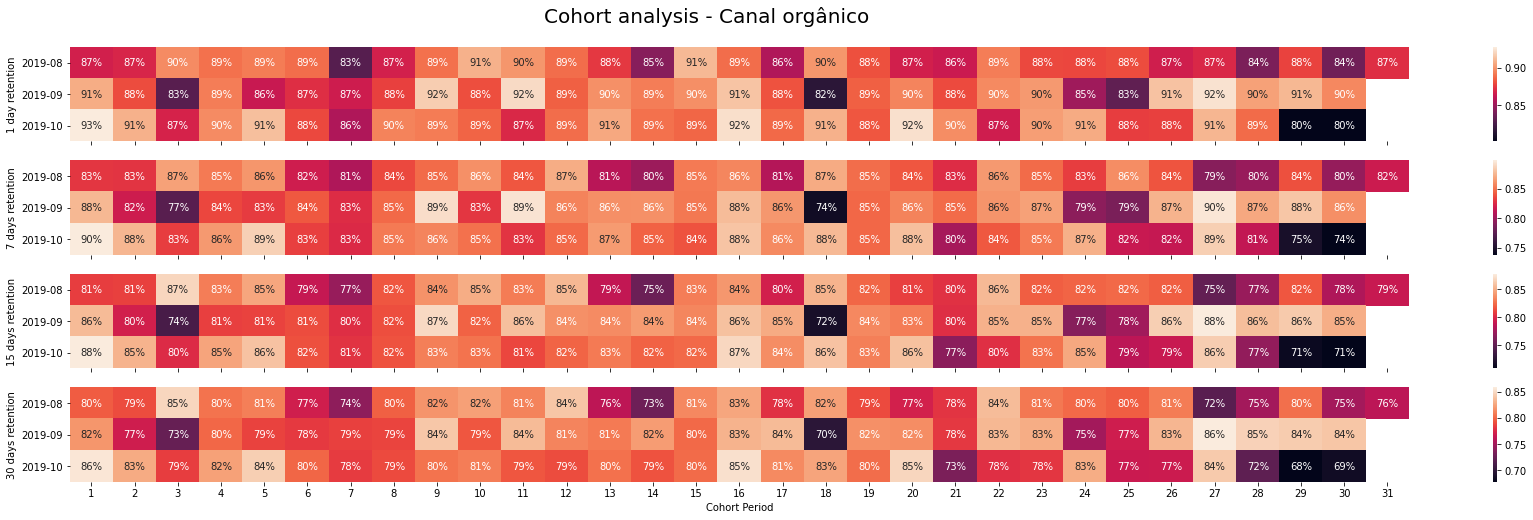

In [37]:
periods = ["Installers retained for 1 day",
           "Installers retained for 7 days",
           "Installers retained for 15 days",
           "Installers retained for 30 days"]
days = ["1 day retention", "7 days retention", "15 days retention", "30 days retention"]
fig, ax = plt.subplots(4, 1, figsize=(30, 8), sharex=True, sharey=True)



for idx, period in enumerate(periods):
  user_retention = cohorts[period].unstack(0).divide(cohort_group_size, axis=1)
  sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', ax=ax[idx]);
  ax[idx].set(xlabel="", ylabel=days[idx])
plt.xlabel("Cohort Period")
fig.suptitle("Cohort analysis - Canal orgânico", x=0.42, y=0.95, fontsize=20)
plt.savefig("cohort-org")
plt.show();

Author: Gabriel Assunção Domene